# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_api_key='b0abfb0afe33f1b53ae6a58eaebd4cf5'
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json() 
response

NameError: name 'url' is not defined

In [4]:
#Base Url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

# set up lists to hold reponse info
citylist = []
lat = []
lng = []
temp = []
max_temp = []
humidity = []
cloud = []
wind = []
country = []
date = []

#Counter for record processing
counter = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()      
        lat_city = response["coord"]["lat"]
        lat.append(lat_city)
        temp_city = response["main"]["temp"]
        temp.append(temp_city)
        lng_city = response["coord"]["lon"]
        lng.append(lng_city)
        maxtemp_city = response["main"]["temp_max"]
        max_temp.append(maxtemp_city)
        hum_city = response["main"]["humidity"]
        humidity.append(hum_city)
        cloud_city = response["clouds"]["all"]
        cloud.append(cloud_city)
        wind_city = response["wind"]["speed"]
        wind.append(wind_city)
        country_city = response["sys"]["country"]
        country.append(country_city)
        date_city = response["dt"]
        date.append(date_city)
        citylist.append(city)
    #print(json.dumps(response, indent=4, sort_keys=True))
            
    except (KeyError, IndexError):
        print("City not found... skipping.")
    
    print(f"Processing record {counter}: {city}") 
    counter = counter + 1
        

City not found... skipping.
Processing record 1: vaitupu
Processing record 2: bluff
Processing record 3: carnarvon
Processing record 4: muros
City not found... skipping.
Processing record 5: yanan
Processing record 6: esperance
Processing record 7: hermanus
Processing record 8: college
Processing record 9: punta arenas
Processing record 10: puerto ayora
Processing record 11: pringsewu
Processing record 12: hobart
Processing record 13: souillac
Processing record 14: albany
Processing record 15: kaitangata
Processing record 16: port blair
Processing record 17: arraial do cabo
Processing record 18: qarayeri
Processing record 19: eyl
Processing record 20: sortland
Processing record 21: bonthe
Processing record 22: iqaluit
Processing record 23: sultanpur
Processing record 24: yar-sale
City not found... skipping.
Processing record 25: mys shmidta
City not found... skipping.
Processing record 26: attawapiskat
Processing record 27: kapaa
Processing record 28: rocha
Processing record 29: puerto

Processing record 241: banda aceh
Processing record 242: nyurba
Processing record 243: iquitos
Processing record 244: san patricio
Processing record 245: gardenstown
Processing record 246: port macquarie
City not found... skipping.
Processing record 247: sumbawa
Processing record 248: majene
Processing record 249: matara
Processing record 250: vilhena
Processing record 251: saint anthony
Processing record 252: neiafu
City not found... skipping.
Processing record 253: sorvag
Processing record 254: sola
Processing record 255: kirakira
Processing record 256: kavieng
Processing record 257: jalu
Processing record 258: shimoda
Processing record 259: okato
Processing record 260: basco
Processing record 261: hithadhoo
Processing record 262: komyshuvakha
Processing record 263: tessalit
Processing record 264: ongandjera
Processing record 265: ballina
Processing record 266: novyy urengoy
Processing record 267: sorong
Processing record 268: grand gaube
Processing record 269: sakakah
Processing rec

Processing record 479: mahebourg
Processing record 480: farmington
Processing record 481: severnoye
Processing record 482: samoylovka
Processing record 483: gejiu
Processing record 484: maniitsoq
Processing record 485: kikwit
Processing record 486: shinjo
Processing record 487: coquimbo
Processing record 488: black forest
Processing record 489: indramayu
Processing record 490: sinjhoro
Processing record 491: olafsvik
Processing record 492: aswan
Processing record 493: arman
Processing record 494: horodkivka
Processing record 495: morant bay
Processing record 496: vanimo
Processing record 497: meulaboh
Processing record 498: ialibu
Processing record 499: beyneu
Processing record 500: rach gia
Processing record 501: south river
Processing record 502: huntingdon
Processing record 503: saint-pierre
Processing record 504: fontanka
Processing record 505: linxia
Processing record 506: itacare
Processing record 507: tatahuicapan
Processing record 508: tuban
Processing record 509: langsa
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
citydf = pd.DataFrame({"City":citylist,
                       "Lat": lat,
                       "Lng" : lng,
                       "Temp F": temp,
                       "Max Temp F" : max_temp,
                       "Humidity":humidity,
                       "Cloudiness":cloud,
                       "Wind Speed":wind,
                       "Country":country,
                       "Date": date})
citydf.count()

City          598
Lat           598
Lng           598
Temp F        598
Max Temp F    598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [23]:
#Export to.csv file
citydf.to_csv("cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
citydf['Humidity'].max()

100

In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

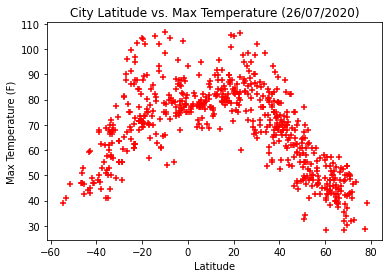

In [15]:
plt.figure()
plt.scatter(citydf["Lat"], citydf["Max Temp F"], marker="+", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (26/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

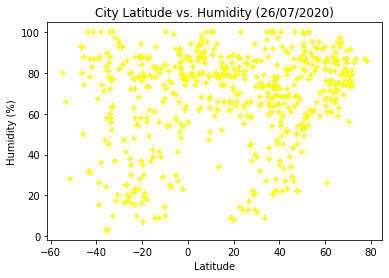

In [14]:
plt.figure()
plt.scatter(citydf["Lat"], citydf["Humidity"], marker="+", facecolors="yellow", edgecolors="black")
plt.title("City Latitude vs. Humidity (26/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

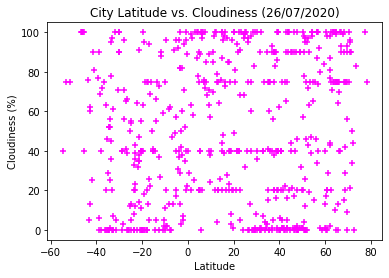

In [19]:
plt.figure()
plt.scatter(citydf["Lat"], citydf["Cloudiness"], marker="+", facecolors="magenta", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (26/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

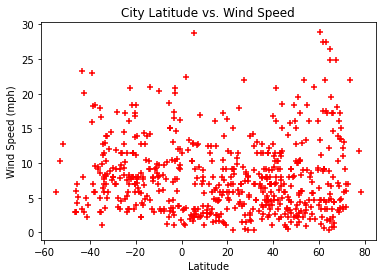

In [21]:
plt.figure()
plt.scatter(citydf["Lat"], citydf["Wind Speed"], marker="+", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


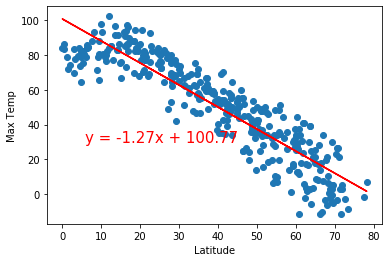

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


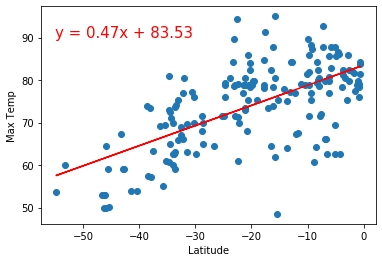

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


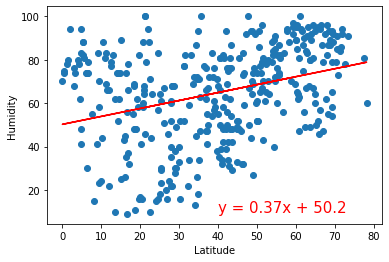

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


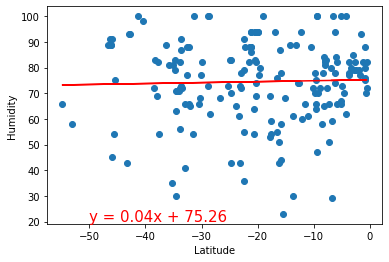

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


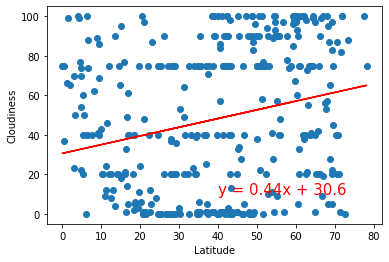

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


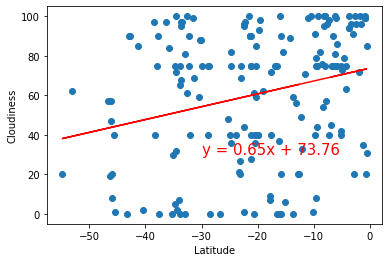

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


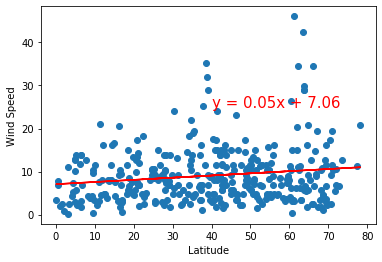

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


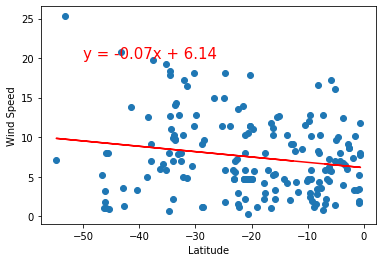